<a href="https://colab.research.google.com/github/aymuos/starship/blob/main/fundamental_EDA/actuallyWorking/feature_creator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
!pip install duckdb polars pyarrow

## Objective

- create features using both the datasets
-

In [132]:
base = "/content/drive/MyDrive/ml/PROCESSED/matched/city_divided/"

idea : trajectory[t−Δ , t]  →  delivery(t) where t = receipt_time
Δ = 15 minutes (initial)

In [133]:
import polars as pl

cq_delivery = "/content/drive/MyDrive/ml/PROCESSED/matched/city_divided/chongqing_data.csv"
cq_gps = "/content/drive/MyDrive/ml/PROCESSED/matched/city_divided/chongqing_delivery_data.parquet"

# Load the CSV file
chongqing_df_csv = pl.read_csv(cq_delivery)
print("\nChongqing CSV DataFrame (head 5):")
print(chongqing_df_csv.head(5))

# Load the Parquet file
chongqing_df_parquet = pl.read_parquet(cq_gps)
print("\nChongqing Parquet DataFrame (head 5):")
print(chongqing_df_parquet.head(5))


Chongqing CSV DataFrame (head 5):
shape: (5, 16)
┌─────────────┬─────────────┬────────────┬──────────┬───┬──────────┬─────┬────────────┬────────────┐
│ order_id    ┆ from_dipan_ ┆ delivery_u ┆ poi_lng  ┆ … ┆ sign_lat ┆ ds  ┆ from_city_ ┆ horizon_ET │
│ ---         ┆ id          ┆ ser_id     ┆ ---      ┆   ┆ ---      ┆ --- ┆ en         ┆ A          │
│ str         ┆ ---         ┆ ---        ┆ f64      ┆   ┆ str      ┆ i64 ┆ ---        ┆ ---        │
│             ┆ str         ┆ str        ┆          ┆   ┆          ┆     ┆ str        ┆ f64        │
╞═════════════╪═════════════╪════════════╪══════════╪═══╪══════════╪═════╪════════════╪════════════╡
│ 55be8cdf127 ┆ c5ac5ba9980 ┆ df0b594618 ┆ 8.8999e6 ┆ … ┆ null     ┆ 318 ┆ Chongqing  ┆ 361.0      │
│ 0526231c9ba ┆ 1aa6b85ba47 ┆ d1ba6f619e ┆          ┆   ┆          ┆     ┆            ┆            │
│ 3387f51b…   ┆ 3d926051…   ┆ 4e7dd03444 ┆          ┆   ┆          ┆     ┆            ┆            │
│             ┆             ┆ …          

In [134]:
chongqing_df_csv = chongqing_df_csv.with_columns([
    pl.col("receipt_time").str.to_datetime("%Y-%m-%d %H:%M:%S").alias("receipt_time"),
    pl.col("sign_time").str.to_datetime("%Y-%m-%d %H:%M:%S").alias("sign_time")
])

print("Chongqing CSV DataFrame with updated time column types:")
print(chongqing_df_csv.head(5))

Chongqing CSV DataFrame with updated time column types:
shape: (5, 16)
┌─────────────┬─────────────┬────────────┬──────────┬───┬──────────┬─────┬────────────┬────────────┐
│ order_id    ┆ from_dipan_ ┆ delivery_u ┆ poi_lng  ┆ … ┆ sign_lat ┆ ds  ┆ from_city_ ┆ horizon_ET │
│ ---         ┆ id          ┆ ser_id     ┆ ---      ┆   ┆ ---      ┆ --- ┆ en         ┆ A          │
│ str         ┆ ---         ┆ ---        ┆ f64      ┆   ┆ str      ┆ i64 ┆ ---        ┆ ---        │
│             ┆ str         ┆ str        ┆          ┆   ┆          ┆     ┆ str        ┆ f64        │
╞═════════════╪═════════════╪════════════╪══════════╪═══╪══════════╪═════╪════════════╪════════════╡
│ 55be8cdf127 ┆ c5ac5ba9980 ┆ df0b594618 ┆ 8.8999e6 ┆ … ┆ null     ┆ 318 ┆ Chongqing  ┆ 361.0      │
│ 0526231c9ba ┆ 1aa6b85ba47 ┆ d1ba6f619e ┆          ┆   ┆          ┆     ┆            ┆            │
│ 3387f51b…   ┆ 3d926051…   ┆ 4e7dd03444 ┆          ┆   ┆          ┆     ┆            ┆            │
│             ┆     

In [135]:
print("Chongqing CSV DataFrame schema after datetime conversion:")
print(chongqing_df_csv.schema)

Chongqing CSV DataFrame schema after datetime conversion:
Schema({'order_id': String, 'from_dipan_id': String, 'delivery_user_id': String, 'poi_lng': Float64, 'poi_lat': Float64, 'aoi_id': String, 'typecode': String, 'receipt_time': Datetime(time_unit='us', time_zone=None), 'receipt_lng': Float64, 'receipt_lat': Float64, 'sign_time': Datetime(time_unit='us', time_zone=None), 'sign_lng': String, 'sign_lat': String, 'ds': Int64, 'from_city_en': String, 'horizon_ETA': Float64})


In [136]:
chongqing_df_csv = chongqing_df_csv.drop(["sign_lat", "sign_lng"])

print("Chongqing CSV DataFrame after dropping sign_lat and sign_lng (head 5):")
print(chongqing_df_csv.head(5))

print("\nChongqing CSV DataFrame schema after dropping sign_lat and sign_lng:")
print(chongqing_df_csv.schema)

Chongqing CSV DataFrame after dropping sign_lat and sign_lng (head 5):
shape: (5, 14)
┌────────────┬────────────┬────────────┬──────────┬───┬────────────┬─────┬────────────┬────────────┐
│ order_id   ┆ from_dipan ┆ delivery_u ┆ poi_lng  ┆ … ┆ sign_time  ┆ ds  ┆ from_city_ ┆ horizon_ET │
│ ---        ┆ _id        ┆ ser_id     ┆ ---      ┆   ┆ ---        ┆ --- ┆ en         ┆ A          │
│ str        ┆ ---        ┆ ---        ┆ f64      ┆   ┆ datetime[μ ┆ i64 ┆ ---        ┆ ---        │
│            ┆ str        ┆ str        ┆          ┆   ┆ s]         ┆     ┆ str        ┆ f64        │
╞════════════╪════════════╪════════════╪══════════╪═══╪════════════╪═════╪════════════╪════════════╡
│ 55be8cdf12 ┆ c5ac5ba998 ┆ df0b594618 ┆ 8.8999e6 ┆ … ┆ 2021-03-18 ┆ 318 ┆ Chongqing  ┆ 361.0      │
│ 70526231c9 ┆ 01aa6b85ba ┆ d1ba6f619e ┆          ┆   ┆ 14:33:00   ┆     ┆            ┆            │
│ ba3387f51b ┆ 473d926051 ┆ 4e7dd03444 ┆          ┆   ┆            ┆     ┆            ┆            │
│ …  

Feature creation starts
---


---


In [137]:
delivery = (
    chongqing_df_csv
    .rename({"horizon_ETA": "eta_mins"})
    .with_columns(
        pl.col("delivery_user_id").cast(pl.Utf8)
    )
    .sort(["delivery_user_id", "receipt_time"])
)

In [138]:
# defining just the gps extraction windows

start_time = delivery["receipt_time"].min()
end_time   = delivery["receipt_time"].max()

couriers = delivery["delivery_user_id"].unique().to_list()

print(len(couriers), "couriers")

145 couriers


In [139]:
import duckdb

con = duckdb.connect()

PRE_MIN = 15

gps_df = con.execute(f"""
SELECT
    postman_id,
    gps_time,
    lat,
    lng
FROM parquet_scan('/content/drive/MyDrive/ml/PROCESSED/matched/city_divided/chongqing_delivery_data.parquet')
WHERE
    postman_id IN {tuple(couriers)}
    AND gps_time BETWEEN
        TIMESTAMP '{start_time}' - INTERVAL '{PRE_MIN} minutes'
        AND TIMESTAMP '{end_time}'
""").pl()

gps_df = gps_df.rename({"postman_id": "delivery_user_id"})
gps_df = gps_df.sort(["delivery_user_id", "gps_time"])

In [140]:
# Courier Snapshot Before Delivery (ASOF JOIN)

state = delivery.join_asof(
    gps_df,
    left_on="receipt_time",
    right_on="gps_time",
    by="delivery_user_id",
    strategy="backward"
).rename({
    "lat": "last_x",
    "lng": "last_y",
    "gps_time": "last_gps_time"
})

/tmp/ipython-input-950023143.py:3: UserWarning: Sortedness of columns cannot be checked when 'by' groups provided
  state = delivery.join_asof(


In [141]:
# GPS Freshness Feature
state = state.with_columns(
    (pl.col("receipt_time") - pl.col("last_gps_time"))
        .dt.total_minutes()
        .alias("gps_gap_min")
)

In [142]:
state.select("gps_gap_min").describe()

statistic,gps_gap_min
str,f64
"""count""",19062.0
"""null_count""",7608.0
"""mean""",315.771168
"""std""",1520.738809
"""min""",0.0
"""25%""",0.0
"""50%""",0.0
"""75%""",0.0
"""max""",15808.0


gps_time ≤ receipt_time is ensured by asof_join . Invalidate stale gps matches : GPS older than 30 minutes → unusable

-

In [143]:
MAX_GAP = 30  # minutes

state = state.with_columns(
    pl.when(pl.col("gps_gap_min") <= MAX_GAP)
      .then(pl.col("gps_gap_min"))
      .otherwise(None)
      .alias("gps_gap_min")
)

In [144]:
state = state.with_columns([
    pl.when(pl.col("gps_gap_min").is_null())
      .then(None)
      .otherwise(pl.col("last_x"))
      .alias("last_x"),

    pl.when(pl.col("gps_gap_min").is_null())
      .then(None)
      .otherwise(pl.col("last_y"))
      .alias("last_y"),
])


# idea is to prevent stale gps from corrupting matches

In lade Delivery coverage > GPS coverage , So GPS must be treated as:
optional contextual sensor not guaranteed observation. This will influence later bandit formulation.

In [145]:
# diagonistic code

state.select([
    pl.len().alias("rows"),
    pl.col("gps_gap_min").null_count().alias("missing_gps"),
    pl.mean("gps_gap_min").alias("mean_gap"),
    pl.median("gps_gap_min").alias("median_gap"),
])

rows,missing_gps,mean_gap,median_gap
u32,u32,f64,f64
26670,9472,0.324689,0.0


This means :

- rows          = 26670 deliveries
- missing_gps   = 9472  (~35%)
- mean_gap      = 0.32 minutes
- median_gap    = 0.0 minutes

---

- Most deliveries have a GPS sample almost exactly at receipt_time.
- mean_gap < 1 minute i.e stale gps are removed


# Building trajectory window

In [146]:
# Registering table in duckDB

con.register("delivery_tbl", delivery.to_pandas())

In [147]:
speed_q = con.execute(f"""
WITH motion AS (

    SELECT
        SQRT(
            POWER(lat - LAG(lat) OVER w, 2) +
            POWER(lng - LAG(lng) OVER w, 2)
        ) AS dist,

        EXTRACT(EPOCH FROM (
            gps_time - LAG(gps_time) OVER w
        )) AS dt

    FROM parquet_scan('{cq_gps}')

    WINDOW w AS (
        PARTITION BY postman_id
        ORDER BY gps_time
    )
),

clean AS (
    SELECT
        dist / dt AS speed
    FROM motion
    WHERE
        dt > 5           -- remove duplicates
        AND dt < 600     -- remove long gaps
        AND dist < 10000 -- teleportation guard
)

SELECT quantile_cont(speed, 0.99)
FROM clean
""").fetchone()[0]

print(speed_q)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

12.22464498399561


In [148]:
PRE_MIN = 15

traj_features = con.execute(f"""
WITH gps_window AS (

    SELECT
        d.order_id,
        g.gps_time,
        g.lat,
        g.lng,

        LAG(g.lat) OVER (
            PARTITION BY d.order_id
            ORDER BY g.gps_time
        ) AS prev_lat,

        LAG(g.lng) OVER (
            PARTITION BY d.order_id
            ORDER BY g.gps_time
        ) AS prev_lng,

        LAG(g.gps_time) OVER (
            PARTITION BY d.order_id
            ORDER BY g.gps_time
        ) AS prev_time

    FROM delivery_tbl d
    JOIN parquet_scan('{cq_gps}') g
      ON g.postman_id = d.delivery_user_id

    WHERE g.gps_time BETWEEN
        d.receipt_time - INTERVAL '{PRE_MIN} minutes'
        AND d.receipt_time
),

motion AS (

    SELECT
        order_id,

        SQRT(
            POWER(lat - prev_lat, 2) +
            POWER(lng - prev_lng, 2)
        ) AS dist,

        EXTRACT(EPOCH FROM (gps_time - prev_time)) AS dt

    FROM gps_window
),

speed_calc AS (


    SELECT
        order_id,
        dist,
        dt,

        CASE
            WHEN dt IS NULL THEN NULL
            WHEN dt <= 1 THEN NULL        -- remove tiny intervals
            WHEN dist > 5000 THEN NULL   -- teleportation filter
            WHEN dist / dt > 5 THEN NULL   -- speed cap for not natural speed  #TODO Need to change with percentile based methods
            ELSE dist / dt
        END AS speed

    FROM motion
)

SELECT
    order_id,
    COUNT(*) AS gps_points,
    AVG(speed) AS speed_mean,
    SUM(dist) AS distance_travelled

FROM speed_calc
GROUP BY order_id
""").pl()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [149]:
traj_features.head()

order_id,gps_points,speed_mean,distance_travelled
str,i64,f64,f64
"""10f7dfc9f026f95b578b8046fee9c6…",45,1.056792,1132.3883
"""1d34d76dacd872c7c79b8ef6747146…",46,1.023371,3034.906032
"""3b5f098dbacfc3266f526fc31cec0a…",26,0.255508,234.706762
"""44dd5eebedcc1931fb6382cb8b374d…",45,0.239465,210.729346
"""5b7388e73fad0e30dc3466b7589270…",45,0.640803,563.906918


dt <= 1

GPS sampling ≈ 20 seconds.

Anything ≤1 sec is noise.

dist > 5000

Affine coordinates behave like meters-scale space. A courier cannot move 5 km between samples.

This removes privacy jumps.

In [150]:
traj_features.select([
    pl.max("speed_mean").alias("max_speed_mean"),
    pl.mean("speed_mean").alias("mean_speed_mean")
])

max_speed_mean,mean_speed_mean
f64,f64
2.967034,0.492363


conclusion from this is :
missing GPS samples
→ courier reappears far away
→ large dist but moderate dt


Instead of trying to perfectly clean GPS (impossible), we winsorize speeds.

This is standard in:

Uber ETA systems

mobility forecasting

trajectory ML papers

This adding of limit of 5 helped us do trajectory signal extraction
NOT GPS reconstruction

---

In [151]:
# batch rank stuff - sort first

delivery = delivery.sort([
    "delivery_user_id",
    "receipt_time",
    "order_id"   # tie-breaker (critical)
])

# compute batch_size

delivery = delivery.with_columns(
    pl.len()
      .over(["delivery_user_id", "receipt_time"])
      .alias("batch_size")
)

# compute batch rank
delivery = delivery.with_columns(
    pl.int_range(
        0,
        pl.len()
    ).over(["delivery_user_id", "receipt_time"])
    .alias("batch_rank")
)

# TODO : Possible bug ? batch no not resetting after batch_rank completes

In [152]:
import duckdb
import polars as pl

con = duckdb.connect()

speed_df = con.execute(f"""
WITH motion AS (

    SELECT
        SQRT(
            POWER(lat - LAG(lat) OVER w, 2) +
            POWER(lng - LAG(lng) OVER w, 2)
        ) AS dist,

        EXTRACT(EPOCH FROM (
            gps_time - LAG(gps_time) OVER w
        )) AS dt

    FROM parquet_scan('{cq_gps}')

    WINDOW w AS (
        PARTITION BY postman_id
        ORDER BY gps_time
    )
),

clean AS (
    SELECT
        dist/dt AS speed
    FROM motion
    WHERE
        dt IS NOT NULL
        AND dt > 0
        AND dist IS NOT NULL
)

SELECT speed
FROM clean
WHERE speed IS NOT NULL
""").pl()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [153]:
# compute CCDF

speed_df = speed_df.sort("speed")

n = speed_df.height

ccdf = speed_df.with_row_count("rank").with_columns(
    (1 - (pl.col("rank") / n)).alias("ccdf")
).select(["speed", "ccdf"])

/tmp/ipython-input-664092293.py:7: DeprecationWarning: `DataFrame.with_row_count` is deprecated; use `with_row_index` instead. Note that the default column name has changed from 'row_nr' to 'index'.
  ccdf = speed_df.with_row_count("rank").with_columns(


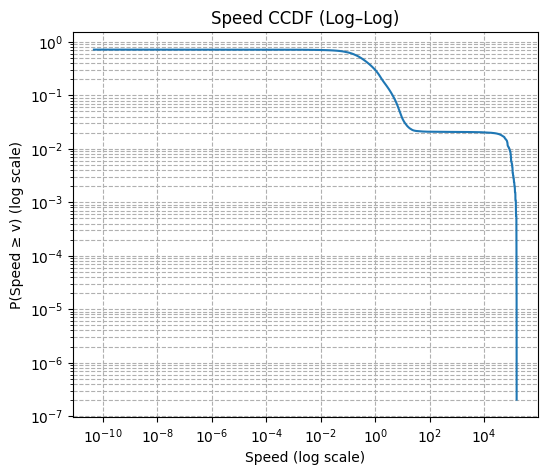

In [154]:
# PLot log-log CCDF

import matplotlib.pyplot as plt
import numpy as np

s = ccdf["speed"].to_numpy()
p = ccdf["ccdf"].to_numpy()

mask = (s > 0) & (p > 0)

plt.figure(figsize=(6,5))
plt.loglog(s[mask], p[mask])

plt.xlabel("Speed (log scale)")
plt.ylabel("P(Speed ≥ v) (log scale)")
plt.title("Speed CCDF (Log–Log)")
plt.grid(True, which="both", ls="--")

plt.show()

In [155]:
features = (
    delivery
      .join(state.select(["order_id","last_x","last_y","gps_gap_min"]), on="order_id", how="left")
      .join(traj_features, on="order_id", how="left")
)

merging features

In [156]:
# adding temporal context

features = features.with_columns([
    pl.col("receipt_time").dt.hour().alias("hour"),
    pl.col("receipt_time").dt.weekday().alias("weekday"),

    pl.col("order_id").cum_count().over("delivery_user_id")
        .alias("delivery_sequence")
])

In [157]:
features.schema

Schema([('order_id', String),
        ('from_dipan_id', String),
        ('delivery_user_id', String),
        ('poi_lng', Float64),
        ('poi_lat', Float64),
        ('aoi_id', String),
        ('typecode', String),
        ('receipt_time', Datetime(time_unit='us', time_zone=None)),
        ('receipt_lng', Float64),
        ('receipt_lat', Float64),
        ('sign_time', Datetime(time_unit='us', time_zone=None)),
        ('ds', Int64),
        ('from_city_en', String),
        ('eta_mins', Float64),
        ('batch_size', UInt32),
        ('batch_rank', Int64),
        ('last_x', Float64),
        ('last_y', Float64),
        ('gps_gap_min', Int64),
        ('gps_points', Int64),
        ('speed_mean', Float64),
        ('distance_travelled', Float64),
        ('hour', Int8),
        ('weekday', Int8),
        ('delivery_sequence', UInt32)])

In [158]:
features.head()

order_id,from_dipan_id,delivery_user_id,poi_lng,poi_lat,aoi_id,typecode,receipt_time,receipt_lng,receipt_lat,sign_time,ds,from_city_en,eta_mins,batch_size,batch_rank,last_x,last_y,gps_gap_min,gps_points,speed_mean,distance_travelled,hour,weekday,delivery_sequence
str,str,str,f64,f64,str,str,datetime[μs],f64,f64,datetime[μs],i64,str,f64,u32,i64,f64,f64,i64,i64,f64,f64,i8,i8,u32
"""7b15e523a08ad352b9f22bb4ecd998…","""37e976ad4abb10da92c97c6b34f7f5…","""0008c2b6a2314db8715301b7eeeebc…",8.9031e6,-7.6873e6,"""bfac06c1b710a20d8dcfb8d3093d7e…","""203ac3454d75e02ebb0a3c6f51d735…",2021-03-18 08:20:00,8.9041e6,-7.6866e6,2021-03-18 11:51:00,318,"""Chongqing""",211.0,1,0,null,null,null,null,null,null,8,4,1
"""3d7ca50514737df23244a2c633b7ee…","""37e976ad4abb10da92c97c6b34f7f5…","""0008c2b6a2314db8715301b7eeeebc…",8.9035e6,-7.6870e6,"""8ceca456f58ab1d2595d571a2205c5…","""73ffcbd1b26557b462b14e4dd4c57f…",2021-03-18 08:21:00,8.9041e6,-7.6866e6,2021-03-18 11:26:00,318,"""Chongqing""",185.0,3,0,null,null,null,null,null,null,8,4,2
"""5134623a6ae48bf37cc58bbcb22412…","""37e976ad4abb10da92c97c6b34f7f5…","""0008c2b6a2314db8715301b7eeeebc…",8.9028e6,-7.6875e6,"""8b8a66982b68f85ed1d8e56dfe3144…","""73ffcbd1b26557b462b14e4dd4c57f…",2021-03-18 08:21:00,8.9041e6,-7.6866e6,2021-03-18 18:19:00,318,"""Chongqing""",598.0,3,1,null,null,null,null,null,null,8,4,3
"""95334065d9951e356138196715ba21…","""37e976ad4abb10da92c97c6b34f7f5…","""0008c2b6a2314db8715301b7eeeebc…",8.9032e6,-7.6870e6,"""35ba604f0afd85d280cb9d96a69874…","""203ac3454d75e02ebb0a3c6f51d735…",2021-03-18 08:21:00,8.9041e6,-7.6866e6,2021-03-18 18:33:00,318,"""Chongqing""",612.0,3,2,null,null,null,null,null,null,8,4,4
"""4767aafe217550daac5895cbc46b46…","""37e976ad4abb10da92c97c6b34f7f5…","""0008c2b6a2314db8715301b7eeeebc…",8.9030e6,-7.6871e6,"""594c43284e8d7dedd4fcf06106379f…","""203ac3454d75e02ebb0a3c6f51d735…",2021-03-18 08:23:00,8.9041e6,-7.6866e6,2021-03-18 12:18:00,318,"""Chongqing""",235.0,1,0,null,null,null,null,null,null,8,4,5


In [159]:
features.select([
    pl.len().alias("rows"),
    pl.mean("gps_points"),
    pl.mean("speed_mean"),
    pl.mean("eta_mins")
])

rows,gps_points,speed_mean,eta_mins
u32,f64,f64,f64
26670,34.390476,0.492363,285.018823


build active_orders_at_receipt_time (courier workload).

how many deliveries the courier was already handling when a new order arrived. We use an event sweep algorithm (industry standard) instead of self-join n*n.

In [160]:
delivery = delivery.sort([
    "delivery_user_id",
    "receipt_time"
]) # ensuring sorting

In [161]:
start_events = delivery.select([
    "delivery_user_id",
    pl.col("receipt_time").alias("time"),
    pl.lit(1).alias("delta"),
    pl.lit(1).alias("priority")   # receipts second
])

end_events = delivery.select([
    "delivery_user_id",
    pl.col("sign_time").alias("time"),
    pl.lit(-1).alias("delta"),
    pl.lit(0).alias("priority")   # signs first
])

events = pl.concat([start_events, end_events])

In [162]:
# compute active current deliveries

events = (
    events
    .sort(["delivery_user_id", "time", "priority"])
    .with_columns(
        pl.col("delta")
        .cum_sum()
        .over("delivery_user_id")
        .alias("active_orders")
    )
)

In [163]:
# Attach workload at receipt_time (ASOF join)
workload = delivery.join_asof(
    events.select([
        "delivery_user_id",
        "time",
        "active_orders"
    ]),
    left_on="receipt_time",
    right_on="time",
    by="delivery_user_id",
    strategy="backward"
)

/tmp/ipython-input-2250453515.py:2: UserWarning: Sortedness of columns cannot be checked when 'by' groups provided
  workload = delivery.join_asof(


In [164]:
# removing self count

workload = workload.with_columns(
    (pl.col("active_orders") - 1)
    .clip(lower_bound=0)
    .alias("active_orders_at_receipt_time")
)

In [165]:
# merging into features table

features = features.join(
    workload.select([
        "order_id",
        "active_orders_at_receipt_time"
    ]),
    on="order_id",
    how="left"
)

In [166]:
features.select([
    pl.mean("active_orders_at_receipt_time").alias("aoart_mean"),
    pl.max("active_orders_at_receipt_time").alias("aoart_max")
])

aoart_mean,aoart_max
f64,i32
10.567004,68


Missing trajectory correlates with:

- indoor deliveries

- dense urban regions

- courier behavior

- phone battery / device quality

- congestion

In [167]:
# imp for bandits
features = features.with_columns(
    pl.col("speed_mean")
      .is_not_null()
      .cast(pl.Int8)
      .alias("is_trajectory_available")
)

In [168]:
# structural fill as imputation

features = features.with_columns([
    pl.col("speed_mean").fill_null(0),
    pl.col("distance_travelled").fill_null(0),
    pl.col("gps_points").fill_null(0)
])


# 0 = no observed motion
# indicator explains why

THe idea here is to have Bandit learn two policies:

if GPS available → trajectory policy
if GPS missing   → workload/time policy

Without indicator , the model confuses absence with slow movement.

In [169]:
# testing corr

features.select(
    pl.corr(
        "active_orders_at_receipt_time",
        "is_trajectory_available"
    )
)

active_orders_at_receipt_time
f64
-0.066676



ρ(workload, GPS available)≈−0.067

This is:

- very small magnitude

- slightly negative

- essentially near independence

thus GPS missingness is NOT strongly driven by courier workload.

missing GPS → confounded workload signal

which means trajectory signal and workload signal are complementary
- features add independent information
- contextual bandit will benefit from both

In [170]:
features.group_by(
    pl.col("active_orders_at_receipt_time").clip(upper_bound=20)
).agg(
    pl.mean("eta_mins").alias("mean_eta"),
    pl.len().alias("n")
).sort("active_orders_at_receipt_time")

active_orders_at_receipt_time,mean_eta,n
i32,f64,u32
0,190.863333,600
1,175.185185,837
2,232.119403,1273
3,190.290264,1664
4,209.953797,1883
…,…,…
16,316.237931,580
17,328.363636,429
18,347.309375,320


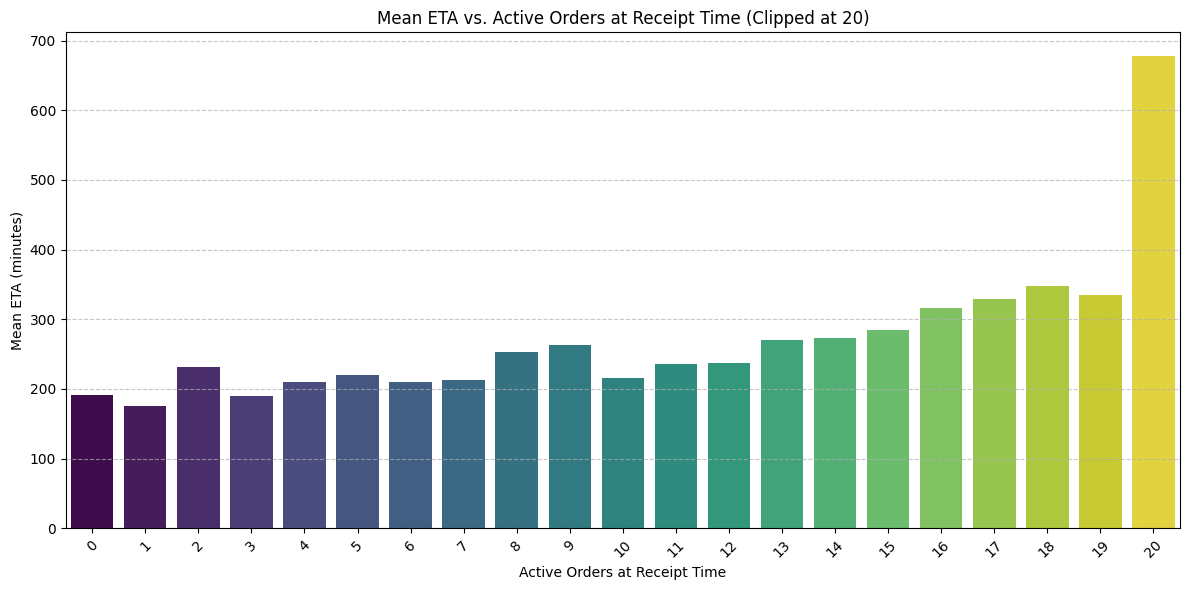

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

# Re-create the aggregated DataFrame for plotting
plot_df = features.group_by(
    pl.col("active_orders_at_receipt_time").clip(upper_bound=20)            # this can go uptil 68 -- our computed number
).agg(
    pl.mean("eta_mins").alias("mean_eta"),
    pl.len().alias("n")
).sort("active_orders_at_receipt_time").to_pandas()

plt.figure(figsize=(12, 6))
sns.barplot(x="active_orders_at_receipt_time", y="mean_eta", data=plot_df, palette="viridis", hue="active_orders_at_receipt_time", legend=False)
plt.title('Mean ETA vs. Active Orders at Receipt Time (Clipped at 20)')
plt.xlabel('Active Orders at Receipt Time')
plt.ylabel('Mean ETA (minutes)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Low workload (0–4)
ETA ≈ 175–230

Noise dominates. Couriers still flexible.

Medium workload (5–15)

ETA trends upward slowly.

This reflects:

route consolidation phase


High workload (>15)

ETA increases strongly.

This is queue saturation.

Extreme workload (=20 bucket)
ETA ≈ 678
n = 3078 (very large!)

20 = ALL workloads ≥ 20

aggregates till 20,21,22,...68

This shape matches queueing theory

In M/G/1 queue models:

𝑊
∝
𝜌
1
−
𝜌
W∝
1−ρ
ρ
	​


Delay explodes near saturation.

need to add non-linear workload features


In [172]:
features = features.with_columns([
    pl.col("active_orders_at_receipt_time")
        .clip(upper_bound=20)
        .alias("workload_capped"),

    (pl.col("active_orders_at_receipt_time") > 10)
        .cast(pl.Int8)
        .alias("high_load"),

    (pl.col("active_orders_at_receipt_time") > 15)
        .cast(pl.Int8)
        .alias("overloaded")
])

In [173]:
# filling nul trajectory with 0

features = features.with_columns(
    pl.col("speed_mean")
      .is_not_null()
      .cast(pl.Int8)
      .alias("is_trajectory_available")
)

Testing if we should use batch ranking as feature - state representation designing .
Batch rank matters only if multiple orders accepted at SAME timestamp i.e. dispatcher pushes a batch simultaneously.

output was 5578 rows with duplicate receipt_time per courier
counts up to 12

This means :

- t0: +12 orders instantly
- t1: +8 orders instantly
- t2: +6 orders instantly
...


with rank batch ,

first package in batch
vs
last package in batch



In [174]:
delivery.group_by(
    ["delivery_user_id", "receipt_time"]
).count().filter(pl.col("count") > 1)

/tmp/ipython-input-90732203.py:3: DeprecationWarning: `GroupBy.count` was renamed; use `GroupBy.len` instead
  ).count().filter(pl.col("count") > 1)


delivery_user_id,receipt_time,count
str,datetime[μs],u32
"""e8fe8f9f4c738ab059f97910c6f87b…",2021-03-28 15:12:00,6
"""f46c7013f10be93c672f7fd480b6f9…",2021-04-01 14:26:00,2
"""0008c2b6a2314db8715301b7eeeebc…",2021-03-25 15:14:00,4
"""54ebd3489546ddeed49495a9d32086…",2021-03-29 08:25:00,2
"""7fbaebc309ff50193ffc64327d15cc…",2021-03-27 08:47:00,5
…,…,…
"""ac102dfc8f10356243d08245504c8f…",2021-03-30 15:26:00,8
"""254a3cb31a672fb23daeda585ed060…",2021-03-25 08:06:00,10
"""d02884307ff13a488b763f6a7bb634…",2021-03-20 08:18:00,2


Adding ordinal rank batching

In [175]:
# delivery = delivery.with_columns(
#     (
#         pl.col("receipt_time")
#         .rank(method="ordinal")
#         .over(["delivery_user_id", "receipt_time"])
#     ).alias("batch_rank")
# )   # POTENTIAL DUPLICATE?

In [176]:
features.select([
    pl.corr("batch_rank","eta_mins"),
    pl.corr("workload_capped","eta_mins"),
    pl.corr("speed_mean","eta_mins")
])

batch_rank,workload_capped,speed_mean
f64,f64,f64
0.16645,0.154929,-0.037711


In [177]:
# batch size computation

delivery = delivery.with_columns(
    pl.len()
    .over(["delivery_user_id", "receipt_time"])
    .alias("batch_size")
)

Interpretation for this is

Feature	Meaning
- batch_size ->	how many orders accepted together
- batch_rank ->	position inside batch
- active_orders ->	total workload

Idea is to have model learn ETA increases ↑ if:
    workload high
    AND rank late in batch


Source : deepETA paper implicitly models this via route order embeddings.

Key references

Li et al., KDD 2018 — DeepETA

Ke et al., KDD 2017 — ETA Prediction for Logistics

Chen et al., SIGSPATIAL 2021 — Learning to Route

Zhang et al., WWW 2020 — Courier Dispatching

In [178]:
features.select([
    pl.corr("batch_rank","eta_mins"),
    pl.corr("workload_capped","eta_mins"),
    pl.corr("speed_mean","eta_mins"),
    pl.corr("gps_gap_min","eta_mins")
])

batch_rank,workload_capped,speed_mean,gps_gap_min
f64,f64,f64,f64
0.16645,0.154929,-0.037711,-0.004935


---

checking the rank and batching

In [179]:
delivery.select([
    pl.max("batch_size"),
    pl.max("batch_rank")
])

batch_size,batch_rank
u32,i64
42,41


In [180]:
# sanity_check

delivery.filter(pl.col("batch_size") == 42)\
.select([
    "receipt_time",
    "order_id",
    "batch_rank"
]).head(50)

receipt_time,order_id,batch_rank
datetime[μs],str,i64
2021-03-24 08:54:00,"""06af1ca8ea57e12f13c2cc3a437659…",0
2021-03-24 08:54:00,"""0e60df1a156818528460210b6dedc8…",1
2021-03-24 08:54:00,"""106051925cccefedc87115222ae545…",2
2021-03-24 08:54:00,"""17ce04f0557edec63405bbb55a3de6…",3
2021-03-24 08:54:00,"""201ab1aa23f46d0ef139408c97300c…",4
…,…,…
2021-03-24 08:54:00,"""e89a7ff413b71af71229419552f762…",37
2021-03-24 08:54:00,"""ef6ff756efcec993db71247856307d…",38
2021-03-24 08:54:00,"""f0be5192a034ce4f38591baa0065c4…",39


In [181]:
# join back

features = features.drop(["batch_rank","batch_size"]).join(
    delivery.select(["order_id","batch_rank","batch_size"]),
    on="order_id",
    how="left"
)

In [182]:
features.select(
    pl.corr("batch_rank","eta_mins")
)

batch_rank
f64
0.16645


ETA is influenced by multiple independent mechanisms:

ETA=f(route)+f(batch position)+f(workload)+f(traffic)+ϵ

Batch position explains one component, not all variance.

So moderate correlation is expected.
dispatch batching behaves nonlinearly.Within a batch: rank 1 → small delay
rank middle → moderate delay
rank last → large delay

In [183]:
# validation

features.group_by(
    pl.col("batch_rank").clip(upper_bound=15)
).agg(
    pl.mean("eta_mins").alias("mean_eta"),
    pl.len().alias("n")
).sort("batch_rank")

batch_rank,mean_eta,n
i64,f64,u32
0,238.005531,9583
1,264.057548,5578
2,284.730188,3773
3,255.220618,2493
4,268.986069,1651
…,…,…
11,352.412281,114
12,485.0,81
13,570.044118,68


Early batch (0–4)

ETA increases gradually:

238 → 285

---
Mid batch (5–10)

ETA steadily increases.

---

DElay explodes at last batch

dispatcher assigns large batch
↓
courier executes route sequentially
↓
last orders wait for entire route

In [184]:
# adding capped features

features = features.with_columns([
    pl.col("batch_rank").clip(upper_bound=15).alias("batch_rank_capped"),

    (pl.col("batch_rank") > 8)
        .cast(pl.Int8)
        .alias("late_batch"),

    (pl.col("batch_rank") > 12)
        .cast(pl.Int8)
        .alias("extreme_batch")
])

Batch rank is acting as a proxy for route position.

# Curent validation

subsystem	validated by
trajectory=	CCDF analysis
workload =	nonlinear ETA curve
batching =	monotonic rank curve
missingness =	independence check

This is a complete courier-state representation.

In [185]:
features.select([
    "late_batch",
    "eta_mins"
]).group_by("late_batch").agg([
    pl.mean("eta_mins").alias("eta_mean"),
    pl.std("eta_mins").alias("eta_std"),
])

late_batch,eta_mean,eta_std
i8,f64,f64
1,777.599628,1813.825481
0,264.350289,674.861819


In [186]:
# checking duplicate table

from collections import Counter

[c for c, n in Counter(features.columns).items() if n > 1]

[]

In [187]:
print(features.schema)

Schema({'order_id': String, 'from_dipan_id': String, 'delivery_user_id': String, 'poi_lng': Float64, 'poi_lat': Float64, 'aoi_id': String, 'typecode': String, 'receipt_time': Datetime(time_unit='us', time_zone=None), 'receipt_lng': Float64, 'receipt_lat': Float64, 'sign_time': Datetime(time_unit='us', time_zone=None), 'ds': Int64, 'from_city_en': String, 'eta_mins': Float64, 'last_x': Float64, 'last_y': Float64, 'gps_gap_min': Int64, 'gps_points': Int64, 'speed_mean': Float64, 'distance_travelled': Float64, 'hour': Int8, 'weekday': Int8, 'delivery_sequence': UInt32, 'active_orders_at_receipt_time': Int32, 'is_trajectory_available': Int8, 'workload_capped': Int32, 'high_load': Int8, 'overloaded': Int8, 'batch_rank': Int64, 'batch_size': UInt32, 'batch_rank_capped': Int64, 'late_batch': Int8, 'extreme_batch': Int8})


In [188]:
features.lazy().explain()


'DF ["order_id", "from_dipan_id", "delivery_user_id", "poi_lng", ...]; PROJECT */33 COLUMNS'

computed:
E[ETA∣late_batch]andVar(ETA∣late_batch)

This is essentially measuring state-dependent uncertainty.

In normal dispatch , mean ETA ≈ 264 , std  ≈ 675
in late dispatch , mean ETA ≈ 778   (≈ 3× larger) , std  ≈ 1814      (≈ 2.7× larger)



Unsupervised regression assumes:

- Var(ϵ∣X)≈const


The data shows:


Var(ϵ∣state) changes drastically

This is heteroscedasticity driven by operational state.

Late batches are fundamentally less predictable.

Points for reward design :

reward = - abs(pred_eta - true_eta) / (1 + workload_capped)

---
What works
-----------------------------------
- latent variable |	proxy feature
-----------------------------
- route position |	batch_rank
- queue pressure |	workload
- mobility state |	speed_mean
- uncertainty regime |	late_batch

In [189]:
# final sanity check

features.select([
    pl.corr("batch_rank","workload_capped"),
    pl.corr("batch_rank","late_batch"),
    pl.corr("workload_capped","late_batch")
])

DuplicateError: the name 'batch_rank' is duplicate

It's possible that multiple expressions are returning the same default column name. If this is the case, try renaming the columns with `.alias("new_name")` to avoid duplicate column names.

In [192]:
# delivery is already an eager DataFrame, so this line is not needed.
# If the intent was to ensure it's a DataFrame, the variable already holds one.
# delivery = delivery.collect() if delivery.lazy else delivery

FINAL RECONCILE

In [193]:
final_df = delivery.clone()

In [194]:
final_df = final_df.join(
    traj_features.select([
        "order_id",
        "last_x",
        "last_y",
        "gps_gap_min",
        "gps_points",
        "speed_mean",
        "distance_travelled"
    ]),
    on="order_id",
    how="left"
)

ColumnNotFoundError: last_x

In [195]:
final_df = final_df.join(
    workload.select([
        "order_id",
        "active_orders_at_receipt_time"
    ]),
    on="order_id",
    how="left"
)

In [196]:
# batch features

final_df = final_df.join(
    delivery.select([
        "order_id",
        "batch_rank",
        "batch_size"
    ]),
    on="order_id",
    how="left"
)

In [197]:
# adding derived features
import polars as pl

final_df = final_df.with_columns([

    # trajectory availability
    (pl.col("gps_points") > 0)
        .cast(pl.Int8)
        .alias("is_trajectory_available"),

    # workload transforms
    pl.col("active_orders_at_receipt_time")
        .clip_max(20)
        .alias("workload_capped"),

    (pl.col("active_orders_at_receipt_time") > 10)
        .cast(pl.Int8)
        .alias("high_load"),

    (pl.col("active_orders_at_receipt_time") > 15)
        .cast(pl.Int8)
        .alias("overloaded"),

    # batch transforms
    pl.col("batch_rank")
        .clip_max(15)
        .alias("batch_rank_capped"),

    (pl.col("batch_rank") > 8)
        .cast(pl.Int8)
        .alias("late_batch"),

    (pl.col("batch_rank") > 12)
        .cast(pl.Int8)
        .alias("extreme_batch"),
])

AttributeError: 'Expr' object has no attribute 'clip_max'

In [198]:
# handling trajectory nulls

final_df = final_df.with_columns([
    pl.col("speed_mean").fill_null(0),
    pl.col("distance_travelled").fill_null(0),
    pl.col("gps_points").fill_null(0),
    pl.col("gps_gap_min").fill_null(999)
])

ColumnNotFoundError: speed_mean

In [199]:
# temporal context

final_df = final_df.with_columns([
    pl.col("receipt_time").dt.hour().alias("hour"),
    pl.col("receipt_time").dt.weekday().alias("weekday")
])

In [200]:
# sanity check

assert final_df.height == delivery.height
assert len(final_df.columns) == len(set(final_df.columns))

In [201]:
final_df.select(pl.col("eta_mins").null_count())

eta_mins
u32
0


In [202]:
final_df.head()

order_id,from_dipan_id,delivery_user_id,poi_lng,poi_lat,aoi_id,typecode,receipt_time,receipt_lng,receipt_lat,sign_time,ds,from_city_en,eta_mins,batch_size,batch_rank,active_orders_at_receipt_time,batch_rank_right,batch_size_right,hour,weekday
str,str,str,f64,f64,str,str,datetime[μs],f64,f64,datetime[μs],i64,str,f64,u32,i64,i32,i64,u32,i8,i8
"""7b15e523a08ad352b9f22bb4ecd998…","""37e976ad4abb10da92c97c6b34f7f5…","""0008c2b6a2314db8715301b7eeeebc…",8.9031e6,-7.6873e6,"""bfac06c1b710a20d8dcfb8d3093d7e…","""203ac3454d75e02ebb0a3c6f51d735…",2021-03-18 08:20:00,8.9041e6,-7.6866e6,2021-03-18 11:51:00,318,"""Chongqing""",211.0,1,0,0,0,1,8,4
"""3d7ca50514737df23244a2c633b7ee…","""37e976ad4abb10da92c97c6b34f7f5…","""0008c2b6a2314db8715301b7eeeebc…",8.9035e6,-7.6870e6,"""8ceca456f58ab1d2595d571a2205c5…","""73ffcbd1b26557b462b14e4dd4c57f…",2021-03-18 08:21:00,8.9041e6,-7.6866e6,2021-03-18 11:26:00,318,"""Chongqing""",185.0,3,0,3,0,3,8,4
"""5134623a6ae48bf37cc58bbcb22412…","""37e976ad4abb10da92c97c6b34f7f5…","""0008c2b6a2314db8715301b7eeeebc…",8.9028e6,-7.6875e6,"""8b8a66982b68f85ed1d8e56dfe3144…","""73ffcbd1b26557b462b14e4dd4c57f…",2021-03-18 08:21:00,8.9041e6,-7.6866e6,2021-03-18 18:19:00,318,"""Chongqing""",598.0,3,1,3,1,3,8,4
"""95334065d9951e356138196715ba21…","""37e976ad4abb10da92c97c6b34f7f5…","""0008c2b6a2314db8715301b7eeeebc…",8.9032e6,-7.6870e6,"""35ba604f0afd85d280cb9d96a69874…","""203ac3454d75e02ebb0a3c6f51d735…",2021-03-18 08:21:00,8.9041e6,-7.6866e6,2021-03-18 18:33:00,318,"""Chongqing""",612.0,3,2,3,2,3,8,4
"""4767aafe217550daac5895cbc46b46…","""37e976ad4abb10da92c97c6b34f7f5…","""0008c2b6a2314db8715301b7eeeebc…",8.9030e6,-7.6871e6,"""594c43284e8d7dedd4fcf06106379f…","""203ac3454d75e02ebb0a3c6f51d735…",2021-03-18 08:23:00,8.9041e6,-7.6866e6,2021-03-18 12:18:00,318,"""Chongqing""",235.0,1,0,4,0,1,8,4


In [203]:
import datetime
import os

output_dir = "/content/drive/MyDrive/ml/PROCESSED/featured_engineered"
os.makedirs(output_dir, exist_ok=True)

# Generate a timestamp for versioning
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"cq_final_features_{timestamp}.parquet"
file_path = os.path.join(output_dir, filename)

# Save the DataFrame to parquet
final_df.write_parquet(file_path)

print("yes")

yes
